# Time Series Data Analysis with pandas

Starting with v0.8, the pandas library has included a rich API for time-series manipulations. In this notebook we will be looking a various pandas methods which are helpful for us to deal with time series data. This notebook is followed by an exercise notebook to experiment this stuff.


##### Table of  Contents:

* [Input/Output](#Input/Output)
* [Dealing with Datetime](#Dealing-with-Datetime)
* [Moving Up and Down](#Moving-Up-and-Down)
* [Window and Lags](#Window-and-Lags)
* [Correlation and Auto Correlation](#Correlation-and-Auto-Correlation)

In [3]:
# All imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import datetime

**Data Structures in "pandas"**

* Series is a one-dimensional labeled array capable of holding any data type

* DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.



# Input/Output

In [14]:
# Pandas support a lot of formats as input like json, csv, text, html, etc. 
# Here we will be taking the input as csv [comma seperated values].
# we can also use various parameters in read_csv like parse_dates [parses string date values]

ts_data = pd.read_csv("data/stock_data.csv")

In [15]:
# A look at the head of the dataframe
ts_data.head()

,date,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
0,10/29/07,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
1,10/30/07,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2,10/31/07,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
3,11/01/07,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
4,11/02/07,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32


In [16]:
#lets check the datatypes of columns in dataframe

ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
date    1000 non-null object
AA      1000 non-null float64
AAPL    1000 non-null float64
GE      1000 non-null float64
IBM     1000 non-null float64
JNJ     1000 non-null float64
MSFT    1000 non-null float64
PEP     1000 non-null float64
SPX     1000 non-null float64
XOM     1000 non-null float64
dtypes: float64(9), object(1)
memory usage: 78.2+ KB


### A Quick look at pandas data types

![dtypes](images/pandas_dtypes.png)

In [17]:
ts_data.describe()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,17.138190,217.386950,18.362250,122.687010,58.228900,24.947840,59.607930,1153.729090,71.513700
std,9.108915,90.627523,6.168905,26.797665,4.515169,3.746426,6.531849,183.562134,8.131698
min,5.100000,78.200000,6.190000,68.140000,42.760000,14.330000,42.460000,676.530000,54.850000
25%,11.027500,142.965000,14.690000,102.200000,55.867500,23.570000,56.535000,1048.495000,65.065000
50%,13.470000,193.970000,16.085000,120.340000,58.960000,25.375000,61.720000,1165.770000,70.905000
75%,17.427500,302.777500,20.282500,137.597500,61.110000,27.250000,63.785000,1306.157500,79.222500
max,41.860000,422.000000,34.970000,190.530000,67.320000,34.070000,71.250000,1549.380000,87.480000


In [35]:
#converts string type to datetime format
ts_data['Date']= pd.to_datetime(ts_data['date']) 
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
date    1000 non-null object
AA      1000 non-null float64
AAPL    1000 non-null float64
GE      1000 non-null float64
IBM     1000 non-null float64
JNJ     1000 non-null float64
MSFT    1000 non-null float64
PEP     1000 non-null float64
SPX     1000 non-null float64
XOM     1000 non-null float64
Date    1000 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 86.0+ KB


In [27]:
# read csv by parsing dates
df = pd.read_csv('data/stock_data.csv', parse_dates=['date'], index_col=0)

In [28]:
df

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
date,,,,,,,,,
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05,35.22,186.18,34.15,105.48,56.70,33.77,64.84,1502.17,80.07
2007-11-06,35.84,191.79,34.14,105.27,56.80,33.47,65.49,1520.27,82.56
2007-11-07,34.76,186.30,33.20,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08,35.00,175.47,33.15,99.05,56.79,31.94,65.50,1474.77,82.00


In [23]:
# getting data using date index
# [from 2008 october to 2009 january]
df['2008 10':'2009 01']

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
date,,,,,,,,,
2008-10-01,20.07,109.12,21.71,104.02,61.19,24.71,65.31,1161.06,73.06
2008-10-02,18.29,100.10,19.63,98.93,61.19,24.49,64.64,1114.28,72.06
2008-10-03,18.16,97.07,19.11,97.70,59.72,24.56,62.90,1099.23,72.47
2008-10-06,17.09,98.14,18.94,95.04,58.22,23.24,60.75,1056.89,71.89
2008-10-07,15.77,89.16,17.99,90.35,56.40,21.68,59.36,996.23,70.73
2008-10-08,13.88,89.79,18.30,85.53,56.29,21.47,57.99,984.94,71.60
2008-10-09,11.76,88.74,16.84,84.06,51.97,20.81,54.26,909.92,63.23
2008-10-10,10.62,96.80,19.05,82.88,50.41,20.06,52.69,899.22,57.98
2008-10-13,13.04,110.26,18.61,87.10,56.58,23.79,56.31,1003.35,67.95


In [29]:
# Truncates a sorted DataFrame/Series before and/or after some
# particular index value. If the axis contains only datetime values,
# before/after parameters are converted to datetime values.
df.truncate?

In [25]:
df.truncate(before='2008 10', after='2009')

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
date,,,,,,,,,
2008-10-01,20.07,109.12,21.71,104.02,61.19,24.71,65.31,1161.06,73.06
2008-10-02,18.29,100.10,19.63,98.93,61.19,24.49,64.64,1114.28,72.06
2008-10-03,18.16,97.07,19.11,97.70,59.72,24.56,62.90,1099.23,72.47
2008-10-06,17.09,98.14,18.94,95.04,58.22,23.24,60.75,1056.89,71.89
2008-10-07,15.77,89.16,17.99,90.35,56.40,21.68,59.36,996.23,70.73
2008-10-08,13.88,89.79,18.30,85.53,56.29,21.47,57.99,984.94,71.60
2008-10-09,11.76,88.74,16.84,84.06,51.97,20.81,54.26,909.92,63.23
2008-10-10,10.62,96.80,19.05,82.88,50.41,20.06,52.69,899.22,57.98
2008-10-13,13.04,110.26,18.61,87.10,56.58,23.79,56.31,1003.35,67.95


In [33]:
# parsing date from multiple columns
pd.read_csv('data/sample_2.csv').head()

,year,month,day,random
0,2018,11,1,-0.803908
1,2018,11,2,1.586827
2,2018,11,3,0.224112
3,2018,11,4,-0.715937
4,2018,11,5,0.010597


In [34]:
# combining all date columns to get date
pd.read_csv('data/sample_2.csv', parse_dates={'date':[0,1,2]}, index_col='date').head()

,random
date,
2018-11-01,-0.803908
2018-11-02,1.586827
2018-11-03,0.224112
2018-11-04,-0.715937
2018-11-05,0.010597


## dateparser

In [35]:
pd.read_csv('data/sample.csv')

,x,random
0,2018-11-01T0-10-1,-0.803908
1,2018-11-02T3-45-3,1.586827
2,2018-11-03T0-34-10,0.224112
3,2018-11-04T11-3-4,-0.715937


In [36]:
pd.read_csv('data/sample.csv', parse_dates= ['x']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
x         4 non-null object
random    4 non-null float64
dtypes: float64(1), object(1)
memory usage: 144.0+ bytes


In [37]:
from datetime import datetime

In [38]:
datetime.strptime('2018-11-01T12-12-00', '%Y-%m-%dT%H-%M-%S')

datetime.datetime(2018, 11, 1, 12, 12)

In [44]:
# Specifying the format to parse the datetime
# Find out various format specifiers here (https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)
def dateparse(x):
    return datetime.strptime(x, '%Y-%m-%dT%H-%M-%S')

In [43]:
#pd.Timestamp('2018-11-01T0-10-1')

In [41]:
dateparse('2018-11-01T0-10-1')

datetime.datetime(2018, 11, 1, 0, 10, 1)

In [42]:
pd.read_csv('data/sample.csv', parse_dates=['x'], date_parser=dateparse)

,x,random
0,2018-11-01 00:10:01,-0.803908
1,2018-11-02 03:45:03,1.586827
2,2018-11-03 00:34:10,0.224112
3,2018-11-04 11:03:04,-0.715937


## Write data

In [45]:
# Creating date index with start and end having frequency of second
date_index = pd.date_range(start='20181217', freq='S', end='20181221')

In [46]:
len(date_index)

345601

In [47]:
# Generated Index
date_index

DatetimeIndex(['2018-12-17 00:00:00', '2018-12-17 00:00:01',
               '2018-12-17 00:00:02', '2018-12-17 00:00:03',
               '2018-12-17 00:00:04', '2018-12-17 00:00:05',
               '2018-12-17 00:00:06', '2018-12-17 00:00:07',
               '2018-12-17 00:00:08', '2018-12-17 00:00:09',
               ...
               '2018-12-20 23:59:51', '2018-12-20 23:59:52',
               '2018-12-20 23:59:53', '2018-12-20 23:59:54',
               '2018-12-20 23:59:55', '2018-12-20 23:59:56',
               '2018-12-20 23:59:57', '2018-12-20 23:59:58',
               '2018-12-20 23:59:59', '2018-12-21 00:00:00'],
              dtype='datetime64[ns]', length=345601, freq='S')

In [57]:
# Creating the dataframe with the above generated index
df = pd.DataFrame(data=np.random.randint(0,100, len(date_index)), index=date_index)

In [61]:
#changing name of the coloumn 
df.columns = ['Value']

In [63]:
#df.head()

In [ ]:
# Exporting data to csv
df.to_csv('data/test_data.csv')

# Dealing with Datetime

In [37]:
# Get the information of the datetime method 
pd.datetime?

In [38]:
#Converts to python datetime object
pd.datetime(2018, 12, 13)

datetime.datetime(2018, 12, 13, 0, 0)

In [64]:
d1 = pd.datetime(2018, 12, 13)

In [65]:
type(d1)

datetime.datetime

In [66]:
d1.month

12

In [86]:
#d1.utcnow()

In [78]:
d1.now()

datetime.datetime(2019, 7, 29, 15, 18, 4, 319459)

## Timestamp
   * In pandas, a single point in time is represented as a timestamp.
   * We can use the to_datetime() function to create timestamps from strings in a wide variety of date/time formats.

In [88]:
# TimeStamp is the pandas equivalent of python's Datetime
# and is interchangable with it in most cases. It's the type used
# for the entries that make up a DatetimeIndex, and other timeseries
# oriented data structures in pandas.
pd.Timestamp?

In [89]:
pd.Timestamp('2018 12 13')

Timestamp('2018-12-13 00:00:00')

In [90]:
pd.Timestamp('20181213 11:12:12.000000')

Timestamp('2018-12-13 11:12:12')

In [91]:
t1 = pd.Timestamp('2018 12 13')

In [92]:
#Timestamp Object
type(t1)

pandas._libs.tslib.Timestamp

In [93]:
# All the available methods and variables available for t1 object
dir(t1)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_date_repr',
 '_get_field',
 '_get_start_end_field',
 '_has_time_component',
 '_repr_base',
 '_round',
 '_short_repr',
 '_time_repr',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'freq',
 'freqstr',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'm

In [94]:
# try out above mentioned methods
t1.to_datetime64()

numpy.datetime64('2018-12-13T00:00:00.000000000')

In [98]:
# To convert a Series or list-like object to Timestamps  
# you can use the to_datetime function.

pd.to_datetime(pd.Series(['Jul 31, 2009', '2010-01-10', None])) #passing a series


0   2009-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]

In [99]:
pd.to_datetime(pd.Series(['Jul 31, 2009', '2010-01-10', None]))[0]

Timestamp('2009-07-31 00:00:00')

In [100]:
pd.to_datetime(['2005/11/23', '2010.12.31']) #passing a list of dates

DatetimeIndex(['2005-11-23', '2010-12-31'], dtype='datetime64[ns]', freq=None)

In [101]:
# If we give a single date
pd.to_datetime('1 7 2018')

Timestamp('2018-01-07 00:00:00')

In [102]:
# We can also use DataTimeIndex Constructor Directly to create Index
pd.DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'])

DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'], dtype='datetime64[ns]', freq=None)

In [105]:
# The string ‘infer’ can be passed in order to set the frequency of the index as the inferred frequency upon creation
pd.DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'], freq='infer')

DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'], dtype='datetime64[ns]', freq='2D')

In [106]:
#Creating a DatetimeIndex list
index_list = pd.DatetimeIndex(['2018-01-01 00:12', '2018-01-03', '2018-01-05'])

In [107]:
index_list

DatetimeIndex(['2018-01-01 00:12:00', '2018-01-03 00:00:00',
               '2018-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [108]:
pd.DataFrame(data=np.arange(3), index=index_list, columns=['range'])

,range
2018-01-01 00:12:00,0
2018-01-03 00:00:00,1
2018-01-05 00:00:00,2


## Date range

In [109]:
#Let's have a look at the doc string
# Return a fixed frequency DatetimeIndex, with day (calendar) as the default frequency
pd.date_range?

In [110]:
# Of the three parameters: ``start``, ``end``, and ``periods``, exactly two must be specified.
pd.date_range(start='20181201', freq='D', periods=30,normalize=True)

DatetimeIndex(['2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08',
               '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-12',
               '2018-12-13', '2018-12-14', '2018-12-15', '2018-12-16',
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', freq='D')

In [111]:
pd.date_range(start='20181201', end='20281231', freq='M')

DatetimeIndex(['2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30',
               ...
               '2028-03-31', '2028-04-30', '2028-05-31', '2028-06-30',
               '2028-07-31', '2028-08-31', '2028-09-30', '2028-10-31',
               '2028-11-30', '2028-12-31'],
              dtype='datetime64[ns]', length=121, freq='M')

In [112]:
# Frequency can also be specified using offsets
pd.date_range(start='20181201', end='20281231', freq=pd.offsets.MonthEnd(2))

DatetimeIndex(['2018-12-31', '2019-02-28', '2019-04-30', '2019-06-30',
               '2019-08-31', '2019-10-31', '2019-12-31', '2020-02-29',
               '2020-04-30', '2020-06-30', '2020-08-31', '2020-10-31',
               '2020-12-31', '2021-02-28', '2021-04-30', '2021-06-30',
               '2021-08-31', '2021-10-31', '2021-12-31', '2022-02-28',
               '2022-04-30', '2022-06-30', '2022-08-31', '2022-10-31',
               '2022-12-31', '2023-02-28', '2023-04-30', '2023-06-30',
               '2023-08-31', '2023-10-31', '2023-12-31', '2024-02-29',
               '2024-04-30', '2024-06-30', '2024-08-31', '2024-10-31',
               '2024-12-31', '2025-02-28', '2025-04-30', '2025-06-30',
               '2025-08-31', '2025-10-31', '2025-12-31', '2026-02-28',
               '2026-04-30', '2026-06-30', '2026-08-31', '2026-10-31',
               '2026-12-31', '2027-02-28', '2027-04-30', '2027-06-30',
               '2027-08-31', '2027-10-31', '2027-12-31', '2028-02-29',
      

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

In [113]:
range_df = pd.DataFrame(data=np.random.randint(0, 100, 300), 
             index=pd.date_range('20181201', freq='H', periods=300, name='date'), 
             columns=['values'])

In [114]:
range_df.head()

,values
date,
2018-12-01 00:00:00,97
2018-12-01 01:00:00,98
2018-12-01 02:00:00,69
2018-12-01 03:00:00,43
2018-12-01 04:00:00,90


Date Offsets can be found here :
* https://pandas.pydata.org/pandas-docs/version/0.12/timeseries.html#dateoffset-objects

## Period 
* A Period represents a span of time (e.g., a day, a month, a quarter, etc). You can specify the span via freq keyword using a frequency alias like below. 

In [115]:
pd.Period?

In [116]:
#Converts string to a Period object
pd.Period('2018 12')

Period('2018-12', 'M')

In [117]:
pd.Period('2018 12 12')

Period('2018-12-12', 'D')

In [118]:
tp = pd.Period('2018 12')

In [119]:
tp.daysinmonth

31

In [120]:
# Adding and subtracting integers from periods shifts the period by its own frequency. 
# Arithmetic is not allowed between Period with different freq (span).

print(tp-1, tp+1)

2018-11 2019-01


In [121]:
# PeriodIndex can be constructed using period_range, with day (calendar) as the default frequency
pd.period_range?

In [122]:
pd.period_range(start='2018 01', freq='H', periods=10)

PeriodIndex(['2018-01-01 00:00', '2018-01-01 01:00', '2018-01-01 02:00',
             '2018-01-01 03:00', '2018-01-01 04:00', '2018-01-01 05:00',
             '2018-01-01 06:00', '2018-01-01 07:00', '2018-01-01 08:00',
             '2018-01-01 09:00'],
            dtype='period[H]', freq='H')

In [123]:
# Period Index can also be used directly
pd.PeriodIndex(['2011-1', '2011-2', '2011-3'], freq='M')

PeriodIndex(['2011-01', '2011-02', '2011-03'], dtype='period[M]', freq='M')

In [124]:
#PeriodIndex supports addition and subtraction with the same rule as Period.

idx = pd.period_range('2014-07-01 09:00', periods=5, freq='H')
idx+2

PeriodIndex(['2014-07-01 11:00', '2014-07-01 12:00', '2014-07-01 13:00',
             '2014-07-01 14:00', '2014-07-01 15:00'],
            dtype='period[H]', freq='H')

In [125]:
pd.DataFrame(data=np.arange(10), 
            index=pd.period_range(start='2018 01', freq='H', periods=10,name='period'),
            columns=['value'])

,value
period,
2018-01-01 00:00,0
2018-01-01 01:00,1
2018-01-01 02:00,2
2018-01-01 03:00,3
2018-01-01 04:00,4
2018-01-01 05:00,5
2018-01-01 06:00,6
2018-01-01 07:00,7
2018-01-01 08:00,8


## Time Delta
    Timedeltas are differences in times, expressed in difference units, e.g. days, hours, minutes, seconds. They can be both positive and negative.

In [126]:
pd.Timedelta?

In [127]:
pd.Timedelta('20m')

Timedelta('0 days 00:20:00')

In [128]:
pd.Timedelta('1d') 

Timedelta('1 days 00:00:00')

In [129]:
# We can add Two Timedelta
pd.Timedelta('1d') + pd.Timedelta('20m') 

Timedelta('1 days 00:20:00')

In [130]:
# We can add time delta to a timestamp
pd.Timestamp('2018 01') + pd.Timedelta('17 m')

Timestamp('2018-01-01 00:17:00')

In [131]:
#Using the top-level pd.to_timedelta, you can convert a scalar, array, list, or Series 
#from a recognized timedelta format / value into a Timedelta type. 
#It will construct Series if the input is a Series, a scalar if the input is scalar-like, 
# otherwise it will output a TimedeltaIndex.
pd.to_timedelta('1 days 06:05:01.00003')

Timedelta('1 days 06:05:01.000030')

In [132]:
pd.to_timedelta(['1 days 06:05:01.00003', '15.5us', 'nan'])

TimedeltaIndex(['1 days 06:05:01.000030', '0 days 00:00:00.000015', NaT], dtype='timedelta64[ns]', freq=None)

## Time Zones

Helps to convert to the specific timezone

In [133]:
from pytz import common_timezones

In [134]:
#common_timezones

In [135]:
[x for x in common_timezones if 'Asia' in x and 'Kolkata' in x]

['Asia/Kolkata']

In [136]:
t1 = pd.Timestamp('2018 12 01', tz='UTC')

In [137]:
t1

Timestamp('2018-12-01 00:00:00+0000', tz='UTC')

In [138]:
t1.tz_convert('Asia/Kolkata')

Timestamp('2018-12-01 05:30:00+0530', tz='Asia/Kolkata')

# Moving Up and Down


## asfreq

   Convert TimeSeries to specified frequency.Optionally provide filling method to pad/backfill missing values.

Frequency strings can be found here:
* https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases


In [4]:
df = pd.read_csv('data/stock_data.csv', parse_dates=[0], index_col=0)

In [5]:
#df

In [6]:
df.index

DatetimeIndex(['2007-10-29', '2007-10-30', '2007-10-31', '2007-11-01',
               '2007-11-02', '2007-11-05', '2007-11-06', '2007-11-07',
               '2007-11-08', '2007-11-09',
               ...
               '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14'],
              dtype='datetime64[ns]', name='date', length=1000, freq=None)

In [7]:
#daily frequency
df.asfreq('12H').index

DatetimeIndex(['2007-10-29 00:00:00', '2007-10-29 12:00:00',
               '2007-10-30 00:00:00', '2007-10-30 12:00:00',
               '2007-10-31 00:00:00', '2007-10-31 12:00:00',
               '2007-11-01 00:00:00', '2007-11-01 12:00:00',
               '2007-11-02 00:00:00', '2007-11-02 12:00:00',
               ...
               '2011-10-09 12:00:00', '2011-10-10 00:00:00',
               '2011-10-10 12:00:00', '2011-10-11 00:00:00',
               '2011-10-11 12:00:00', '2011-10-12 00:00:00',
               '2011-10-12 12:00:00', '2011-10-13 00:00:00',
               '2011-10-13 12:00:00', '2011-10-14 00:00:00'],
              dtype='datetime64[ns]', name='date', length=2893, freq='12H')

In [8]:
df.asfreq?

In [9]:
df = df.asfreq('12H')

In [10]:
df

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
date,,,,,,,,,
2007-10-29 00:00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-29 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-30 00:00:00,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-30 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-31 00:00:00,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-10-31 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-01 00:00:00,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-02 00:00:00,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32


In [13]:
df.loc['2011-10-13 00:00']

AA        10.10
AAPL     408.43
GE        16.22
IBM      186.82
JNJ       64.23
MSFT      27.18
PEP       62.36
SPX     1203.66
XOM       76.37
Name: 2011-10-13 00:00:00, dtype: float64

In [14]:
# Hours to Days --> Downsampling
df.asfreq('D')

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
date,,,,,,,,,
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-05,35.22,186.18,34.15,105.48,56.70,33.77,64.84,1502.17,80.07
2007-11-06,35.84,191.79,34.14,105.27,56.80,33.47,65.49,1520.27,82.56


In [15]:
# Days to hours --> Upsampling
df.asfreq('8H')

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
date,,,,,,,,,
2007-10-29 00:00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-29 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-30 00:00:00,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-30 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-30 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-31 00:00:00,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-10-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-31 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# ffill propagate last valid observation forward to next valid
# Note: this does not fill NaNs that already were present
df.asfreq('4H', method='ffill')

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
date,,,,,,,,,
2007-10-29 00:00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-29 04:00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-29 08:00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-29 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-30 00:00:00,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-30 04:00:00,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-30 08:00:00,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25


In [17]:
# bfill use NEXT valid observation to fill
# Note: this does not fill NaNs that already were present):
df.asfreq('2H',method='bfill')

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
date,,,,,,,,,
2007-10-29 00:00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-29 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 14:00:00,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-29 16:00:00,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25


In [18]:
# To fill with certain default value
# Note: this does not fill NaNs that already were present):
df.asfreq('H',fill_value=9.0)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
date,,,,,,,,,
2007-10-29 00:00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-29 01:00:00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
2007-10-29 02:00:00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
2007-10-29 03:00:00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
2007-10-29 04:00:00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
2007-10-29 05:00:00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
2007-10-29 06:00:00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
2007-10-29 07:00:00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
2007-10-29 08:00:00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00


## resample

Convenience method for frequency conversion and resampling of time
series.

In [19]:
df.resample?

In [20]:
df.resample('2H')

DatetimeIndexResampler [freq=<2 * Hours>, axis=0, closed=left, label=left, convention=start, base=0]

In [21]:
df.resample('2H').sum()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
date,,,,,,,,,
2007-10-29 00:00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-29 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-29 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
def get_range(x):
    return x.max() - x.min()

In [23]:
df.resample('M').agg({'mean', 'max', get_range})

AA                        AAPL                      \
           get_range       mean    max get_range        mean     max   
date                                                                   
2007-10-31      0.98  36.876667  37.41      4.86  187.346667  189.95   
2007-11-30      3.43  33.936190  35.84     38.03  174.658095  191.79   
2007-12-31      3.67  33.493000  35.17     20.97  190.505000  199.83   
2008-01-31      6.88  29.547619  33.63     64.92  160.378095  194.93   
2008-02-29      6.26  33.260000  36.54     14.60  125.153000  133.75   
2008-03-31      3.76  34.489500  36.16     25.37  130.823000  145.06   
2008-04-30      4.73  33.671364  36.43     27.91  158.187273  175.05   
2008-05-31      9.27  37.888571  41.86     12.91  184.759524  189.96   
2008-06-30      6.96  36.315714  40.10     21.99  178.485714  189.43   
2008-07-31      3.44  31.400909  32.80     25.15  167.748636  179.55   
2008-08-31      1.44  29.946190  30.58     26.09  171.069524  179.32   
2008-09-30      8.57  25.017619  28.75     61.70  141.243333  166.96   
2008-10-31     11.54  12.460435  20.07     22.30   99.003913  111.04   
2008-11-30      5.22   9.815263  11.77     30.50   93.940526  110.99   
2008-12-31      3.06   9.295455  10.77     15.02   91.543636  100.06   
2009-01-31      4.15   9.187000  11.60     16.38   88.775000   94.58   
2009-02-28      2.63   6.986842   8.31     15.56   94.074211  102.51   
2009-03-31      2.84   6.186818   7.94     26.76   97.505000  109.87   
2009-04-30      1.62   8.420476   9.05     17.14  120.020952  125.83   
2009-05-31      1.83   9.271000  10.29     16.32  128.149000  135.81   
2009-06-30      2.34  10.540455  11.98     10.66  139.528182  144.67   
2009-07-31      2.48  10.094545  11.53     27.99  149.318182  163.39   
2009-08-31      1.63  12.475714  13.47     10.46  166.280476  170.05   
2009-09-30      2.87  12.957143  14.22     20.97  177.786667  186.15   
2009-10-31      2.39  13.392273  14.11     24.34  192.831364  205.20   
2009-11-30      1.29  12.885000  13.55     18.25  200.320000  207.00   
2009-12-31      3.49  14.404091  16.10     22.69  198.954545  211.64   
2010-01-31      4.65  14.940000  17.19     22.98  207.715263  215.04   
2010-02-28      0.82  13.186316  13.56     12.57  198.795789  204.62   
2010-03-31      1.24  13.752609  14.31     27.00  223.410870  235.85   
2010-04-30      1.58  13.979048  14.84     34.86  251.148571  270.83   
2010-05-31      2.03  11.856000  12.98     30.49  251.461500  266.35   
2010-06-30      1.64  10.992273  11.60     30.87  261.145455  274.07   
2010-07-31      1.21  10.653333  11.11     18.50  254.950000  264.08   
2010-08-31      1.66  10.733636  11.59     23.05  251.323182  262.98   
2010-09-30      1.68  11.342381  12.12     41.99  273.850952  292.32   
2010-10-31      1.44  12.662857  13.27     39.36  300.934286  318.00   
2010-11-30      1.05  13.321905  13.92     18.12  311.588095  318.62   
2010-12-31      1.81  14.495455  15.30      9.07  321.485909  325.47   
2011-01-31      0.85  16.159000  16.51     21.76  338.380000  348.48   
2011-02-28      1.14  17.072105  17.52     24.52  351.182632  363.13   
2011-03-31      1.99  16.485217  17.59     29.99  347.490870  360.00   
2011-04-30      1.99  17.069000  18.06     25.55  340.415500  353.01   
2011-05-31      1.65  16.806190  17.60     17.38  341.784762  349.57   
2011-06-30      1.48  15.390000  16.17     30.78  331.081364  346.10   
2011-07-31      1.76  15.648000  16.46     60.15  372.238000  403.41   
2011-08-31      3.51  12.353478  14.72     43.54  376.762609  396.75   
2011-09-30      2.92  11.209524  12.49     39.40  392.493333  413.45   
2011-10-31      1.40   9.778000  10.30     52.20  389.424000  422.00   

                  GE                         IBM  ...     MSFT       PEP  \
           get_range       mean    max get_range  ...      max get_range   
date                                              ...                      
2007-10-31      0.58  34.606667  34.97      1

## fillna

Fill NA/NaN values using the specified method

In [24]:
df1 = df.asfreq('6M')

In [25]:
df1

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
date,,,,,,,,,
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2008-04-30,32.65,173.95,28.28,113.10,59.74,26.41,61.70,1385.59,85.71
2008-10-31,10.85,107.59,17.29,87.81,55.37,20.84,51.97,968.75,68.92
2009-04-30,8.87,125.83,11.76,98.56,48.05,19.16,46.12,872.81,62.66
2009-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30,13.26,261.09,18.01,125.53,60.95,29.50,62.32,1186.69,65.26
2010-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df1.fillna?

In [27]:
df1.fillna(method='ffill', inplace=True)

In [28]:
df1

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
date,,,,,,,,,
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2008-04-30,32.65,173.95,28.28,113.10,59.74,26.41,61.70,1385.59,85.71
2008-10-31,10.85,107.59,17.29,87.81,55.37,20.84,51.97,968.75,68.92
2009-04-30,8.87,125.83,11.76,98.56,48.05,19.16,46.12,872.81,62.66
2009-10-31,8.87,125.83,11.76,98.56,48.05,19.16,46.12,872.81,62.66
2010-04-30,13.26,261.09,18.01,125.53,60.95,29.50,62.32,1186.69,65.26
2010-10-31,13.26,261.09,18.01,125.53,60.95,29.50,62.32,1186.69,65.26
2011-04-30,13.26,261.09,18.01,125.53,60.95,29.50,62.32,1186.69,65.26


## reindex

 Change Series to new index with optional filling logic

In [41]:
df2 = df.resample('Y').mean()

In [42]:
df2

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
date,,,,,,,,,
2007-12-31,33.935227,182.726364,32.367500,100.510455,59.049091,32.062500,67.457955,1475.839545,82.148182
2008-12-31,26.866364,141.979012,24.344071,103.567866,58.181383,24.760593,59.651581,1220.042055,76.525968
2009-12-31,10.603690,146.814127,12.458730,105.009881,53.496944,21.885397,51.724405,948.046389,67.124960
2010-12-31,12.642262,259.842460,15.862500,129.078611,59.424802,26.262619,61.970040,1139.965516,63.067976
2011-12-31,15.024472,356.526834,18.301910,166.188844,62.585779,25.825930,64.808693,1276.093015,79.042663


In [43]:
date_index = pd.date_range('20071201', end='20111231', freq='7D')

In [44]:
date_index

DatetimeIndex(['2007-12-01', '2007-12-08', '2007-12-15', '2007-12-22',
               '2007-12-29', '2008-01-05', '2008-01-12', '2008-01-19',
               '2008-01-26', '2008-02-02',
               ...
               '2011-10-29', '2011-11-05', '2011-11-12', '2011-11-19',
               '2011-11-26', '2011-12-03', '2011-12-10', '2011-12-17',
               '2011-12-24', '2011-12-31'],
              dtype='datetime64[ns]', length=214, freq='7D')

In [45]:
df2 = df2.reindex(date_index,method='ffill')

In [46]:
df2

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-05,33.935227,182.726364,32.36750,100.510455,59.049091,32.062500,67.457955,1475.839545,82.148182
2008-01-12,33.935227,182.726364,32.36750,100.510455,59.049091,32.062500,67.457955,1475.839545,82.148182
2008-01-19,33.935227,182.726364,32.36750,100.510455,59.049091,32.062500,67.457955,1475.839545,82.148182
2008-01-26,33.935227,182.726364,32.36750,100.510455,59.049091,32.062500,67.457955,1475.839545,82.148182
2008-02-02,33.935227,182.726364,32.36750,100.510455,59.049091,32.062500,67.457955,1475.839545,82.148182


In [47]:
df2.fillna(method='ffill', inplace=True)

In [48]:
df2

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-05,33.935227,182.726364,32.36750,100.510455,59.049091,32.062500,67.457955,1475.839545,82.148182
2008-01-12,33.935227,182.726364,32.36750,100.510455,59.049091,32.062500,67.457955,1475.839545,82.148182
2008-01-19,33.935227,182.726364,32.36750,100.510455,59.049091,32.062500,67.457955,1475.839545,82.148182
2008-01-26,33.935227,182.726364,32.36750,100.510455,59.049091,32.062500,67.457955,1475.839545,82.148182
2008-02-02,33.935227,182.726364,32.36750,100.510455,59.049091,32.062500,67.457955,1475.839545,82.148182


In [49]:
df2.fillna(value='0')

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-12-01,0,0,0,0,0,0,0,0,0
2007-12-08,0,0,0,0,0,0,0,0,0
2007-12-15,0,0,0,0,0,0,0,0,0
2007-12-22,0,0,0,0,0,0,0,0,0
2007-12-29,0,0,0,0,0,0,0,0,0
2008-01-05,33.9352,182.726,32.3675,100.51,59.0491,32.0625,67.458,1475.84,82.1482
2008-01-12,33.9352,182.726,32.3675,100.51,59.0491,32.0625,67.458,1475.84,82.1482
2008-01-19,33.9352,182.726,32.3675,100.51,59.0491,32.0625,67.458,1475.84,82.1482
2008-01-26,33.9352,182.726,32.3675,100.51,59.0491,32.0625,67.458,1475.84,82.1482
2008-02-02,33.9352,182.726,32.3675,100.51,59.0491,32.0625,67.458,1475.84,82.1482


# Window and Lags


## shift & diff

 Shift index by desired number of periods with an optional time freq.

In [66]:
df = pd.read_csv("data/stock_data.csv")

In [69]:
df['AAPL_return'] = df['AAPL'] / df['AAPL'].shift(1)

In [70]:
df.head()

,date,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM,AAPL_return
0,10/29/07,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51,NaN
1,10/30/07,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25,1.010319
2,10/31/07,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03,1.015775
3,11/01/07,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84,0.986786
4,11/02/07,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32,1.002294


In [71]:
#df

In [63]:
df.diff?

In [72]:
df['AAPL_5D_range'] = df['AAPL'].diff(5)

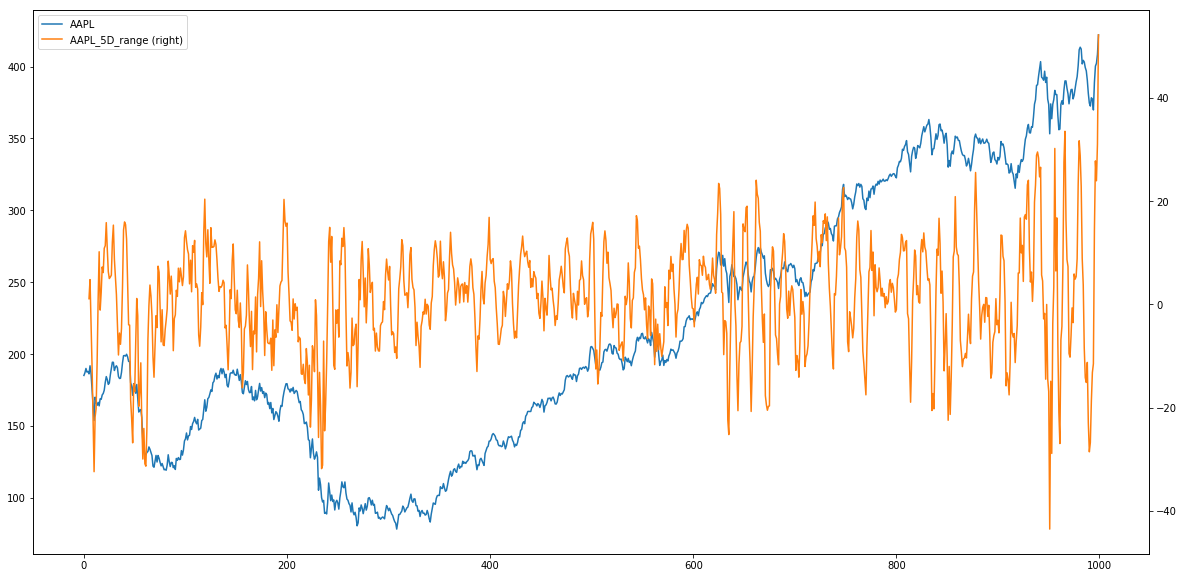

In [73]:
df[['AAPL', 'AAPL_5D_range']].plot(figsize=(20,10), secondary_y='AAPL_5D_range')


## Rolling

 Provide rolling window calculations

In [75]:
df.rolling?


In [76]:
df.rolling(30)

Rolling [window=30,center=False,axis=0]

In [77]:
df['AAPL_rollmean'] = df['AAPL'].rolling(30).mean()

In [78]:
df.head(50)

,date,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM,AAPL_return,AAPL_5D_range,AAPL_rollmean
0,10/29/07,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51,NaN,NaN,NaN
1,10/30/07,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25,1.010319,NaN,NaN
2,10/31/07,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03,1.015775,NaN,NaN
3,11/01/07,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84,0.986786,NaN,NaN
4,11/02/07,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32,1.002294,NaN,NaN
5,11/05/07,35.22,186.18,34.15,105.48,56.70,33.77,64.84,1502.17,80.07,0.991004,1.09,NaN
6,11/06/07,35.84,191.79,34.14,105.27,56.80,33.47,65.49,1520.27,82.56,1.030132,4.79,NaN
7,11/07/07,34.76,186.30,33.20,103.69,56.19,32.65,64.46,1475.62,79.96,0.971375,-3.65,NaN
8,11/08/07,35.00,175.47,33.15,99.05,56.79,31.94,65.50,1474.77,82.00,0.941868,-11.97,NaN
9,11/09/07,34.47,165.37,32.61,93.58,57.29,31.01,65.48,1453.70,79.64,0.942440,-22.50,NaN


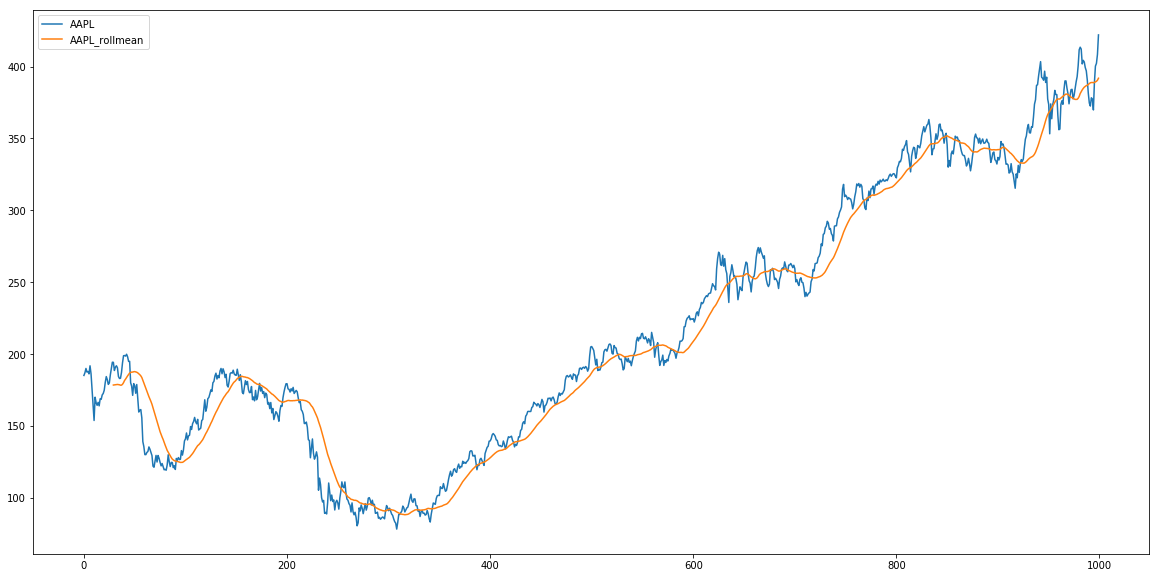

In [79]:
df[['AAPL', 'AAPL_rollmean']].plot(figsize=(20,10))

## expanding

In [80]:
df['AAPL'].expanding().max()

0      185.09
1      187.00
2      189.95
3      189.95
4      189.95
5      189.95
6      191.79
7      191.79
8      191.79
9      191.79
10     191.79
11     191.79
12     191.79
13     191.79
14     191.79
15     191.79
16     191.79
17     191.79
18     191.79
19     191.79
20     191.79
21     191.79
22     191.79
23     191.79
24     191.79
25     191.79
26     191.79
27     191.79
28     194.30
29     194.30
        ...  
970    403.41
971    403.41
972    403.41
973    403.41
974    403.41
975    403.41
976    403.41
977    403.41
978    403.41
979    403.41
980    411.63
981    413.45
982    413.45
983    413.45
984    413.45
985    413.45
986    413.45
987    413.45
988    413.45
989    413.45
990    413.45
991    413.45
992    413.45
993    413.45
994    413.45
995    413.45
996    413.45
997    413.45
998    413.45
999    422.00
Name: AAPL, Length: 1000, dtype: float64

In [83]:
#cumulative product
df['AAPL_return'].cumprod()


0           NaN
1      1.010319
2      1.026257
3      1.012697
4      1.015020
5      1.005889
6      1.036199
7      1.006537
8      0.948025
9      0.893457
10     0.830731
11     0.918256
12     0.897455
13     0.887676
14     0.898968
15     0.885785
16     0.912259
17     0.910152
18     0.926792
19     0.932195
20     0.944459
21     0.973688
22     0.995678
23     0.984494
24     0.966341
25     0.971473
26     1.002215
27     1.026257
28     1.049760
29     1.049273
         ...   
970    2.020909
971    2.051651
972    2.074288
973    2.075423
974    2.039440
975    2.052731
976    2.078016
977    2.103301
978    2.123075
979    2.163812
980    2.223945
981    2.233778
982    2.226701
983    2.170944
984    2.184343
985    2.178238
986    2.157113
987    2.144957
988    2.110163
989    2.060187
990    2.023880
991    2.012534
992    2.043600
993    2.038846
994    1.997947
995    2.100654
996    2.162678
997    2.172943
998    2.206656
999    2.279972
Name: AAPL_return, Lengt

In [86]:
#df['AAPL_return'].cumprod

# Correlation and Auto Correlation


## correlations
    What is correlation ?
    Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.



In [22]:
s = pd.read_csv('data/stock_data.csv', parse_dates= [0], index_col=[0])

In [23]:
# Computes pairwise correlation of columns, excluding NA/null values.
# various methods available are : {‘pearson’, ‘kendall’, ‘spearman’} or callable
s.corr()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
AA,1.000000,-0.136897,0.940204,-0.072867,0.302777,0.543281,0.496932,0.778118,0.667091
AAPL,-0.136897,1.000000,-0.022671,0.957575,0.685515,0.419330,0.644903,0.466928,0.172266
GE,0.940204,-0.022671,1.000000,-0.004338,0.385151,0.629383,0.618583,0.847320,0.693433
IBM,-0.072867,0.957575,-0.004338,1.000000,0.723537,0.391174,0.628398,0.483436,0.254614
JNJ,0.302777,0.685515,0.385151,0.723537,1.000000,0.659579,0.824005,0.708609,0.365483
MSFT,0.543281,0.419330,0.629383,0.391174,0.659579,1.000000,0.775349,0.813296,0.350523
PEP,0.496932,0.644903,0.618583,0.628398,0.824005,0.775349,1.000000,0.884069,0.436561
SPX,0.778118,0.466928,0.847320,0.483436,0.708609,0.813296,0.884069,1.000000,0.693395
XOM,0.667091,0.172266,0.693433,0.254614,0.365483,0.350523,0.436561,0.693395,1.000000


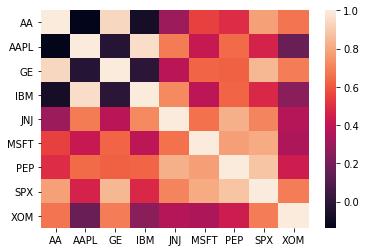

In [24]:
#Plotting the values in a heatmap
sns.heatmap(s.corr())

## auto correlation

    correlation between the elements of a series and others from the same series separated from them by a given interval.

In [25]:

from statsmodels.tsa.stattools import *
from statsmodels.graphics.tsaplots import *

In [27]:
#The NumPy linspace function (sometimes called np.linspace) is a tool in Python for creating numeric sequences.
# Trigonometric sine
data = np.sin(np.linspace(start=0,stop=100,num=100))

In [30]:
# Autocorrelation function for 1d arrays.
# correlation between the elements of a series and others from the same series separated from them by a given interval.
ac_res = acf(data, nlags=100)

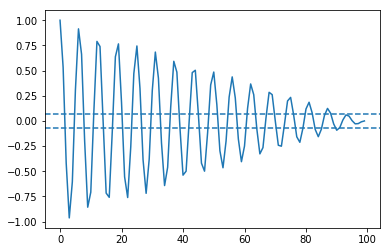

In [31]:
plt.plot(ac_res)
plt.axhline(y=-1.96/np.sqrt(800), linestyle='--')
plt.axhline(y=1.96/np.sqrt(800), linestyle='--')

In [35]:
ls data/

stock_data.csv


In [36]:
ap = pd.read_csv('data/AirPassengers.csv', header=0, parse_dates=[0], index_col=0)

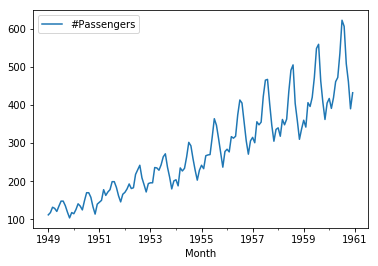

In [37]:
ap.plot()

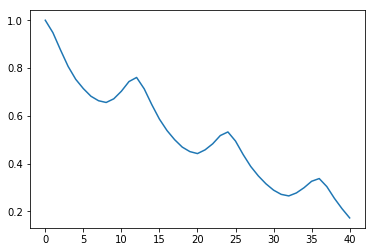

In [38]:
plt.plot(acf(ap))

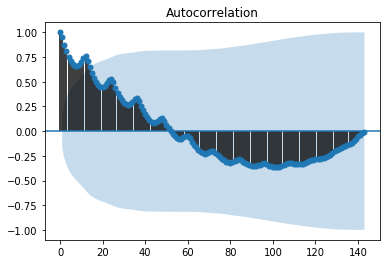

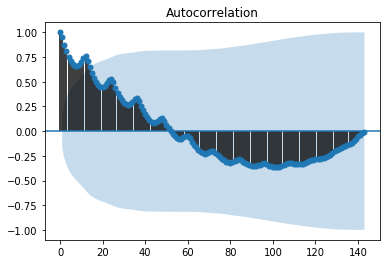

In [39]:
plot_acf(ap)

In [40]:
dtrend_ap = np.log(ap).diff().dropna()


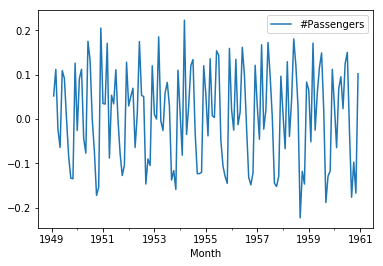

In [41]:
dtrend_ap.plot()

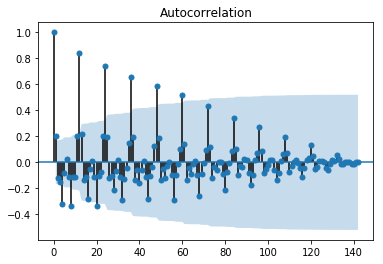

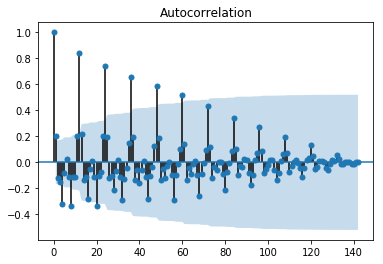

In [42]:
plot_acf(dtrend_ap)